# Introduction to Computational Neuroscience

# Prelim

<!-- - Tick/add your name on the sign-up sheet. -->
- In case of fire/emergency: nearest fire-exit is on basement level, walking
back the way we came.
- Break at 12:55-13:05; bathrooms outside; cafe in central core
upstairs open til 16:00.
- Consider pairing up with someone else if you want to focus on the
science rather than difficulties of learning matlab; there is no time
today to give an introduction to matlab.

# Introduction

This is the third time I've tried this, so be patient!  If nothing
else, in two hours I hope you get to see what you can do with simple
computer models.  New for this year is that we are trying it in Julia online!

Download these notes from http://www.damtp.cam.ac.uk/user/sje30/cnw-2016.zip
and right-click to extract/unzip all the files.

# Getting started

Visit [juliabox.com](http://juliabox.com) and login with Google or github.

Sync the files from http://github.com/sje30/cnw

Open the Console and then type

    julia
    Pkg.add("OrdinaryDiffEq")



In [1]:
using PyPlot


# Background maths


## Euler integration

Given some differential equation for how x changes over time and so
initial condition (i.e. x = some value at time t = 0), we can
integrate them numerically using Euler integration.

$\frac{dx}{dt} = f(x,t)$

$X_{n+1} = X_{n}+ h \frac{dx}{dt}$

$X_{n+1} = X_{n}+ h f(X_{n}, nh)$

Depending on the step-size h.

## Trappenberg example (Appendix B)

Solve differential equation

$\frac{dx}{dt} = t -x + 1$

with initial conditions $x(0) = 1$.

Known solution:

$x(t) = \exp(-t) + t$

We will open [euler1.jl](euler1.jl) in matlab and then run the script by
typing Control and Enter on include line below.

h=0.1; include("euler1.jl")

# Hodgkin-Huxley model


## Reminder of the biology

Its all in the channels!

[http://tinyurl.com/matthews-channel](http://tinyurl.com/matthews-channel)

## Reminder of the mathematics

See [assignment 3](http://www.damtp.cam.ac.uk/user/sje30/teaching/r/spa3-2014.pdf)


Matlab has built-in functions for numerical integration of ODEs,
e.g. ode23, ode45, ode23s.  We will use them here so that we focus on
the problem and not the numerics.
    

## Matlab

1. [hhode.jl](hhode.jl) stores the "science"
2. [myhh.jl](myhh.jl) stores the "numerics"

Run with default I=0.1 and then compare with I=10.

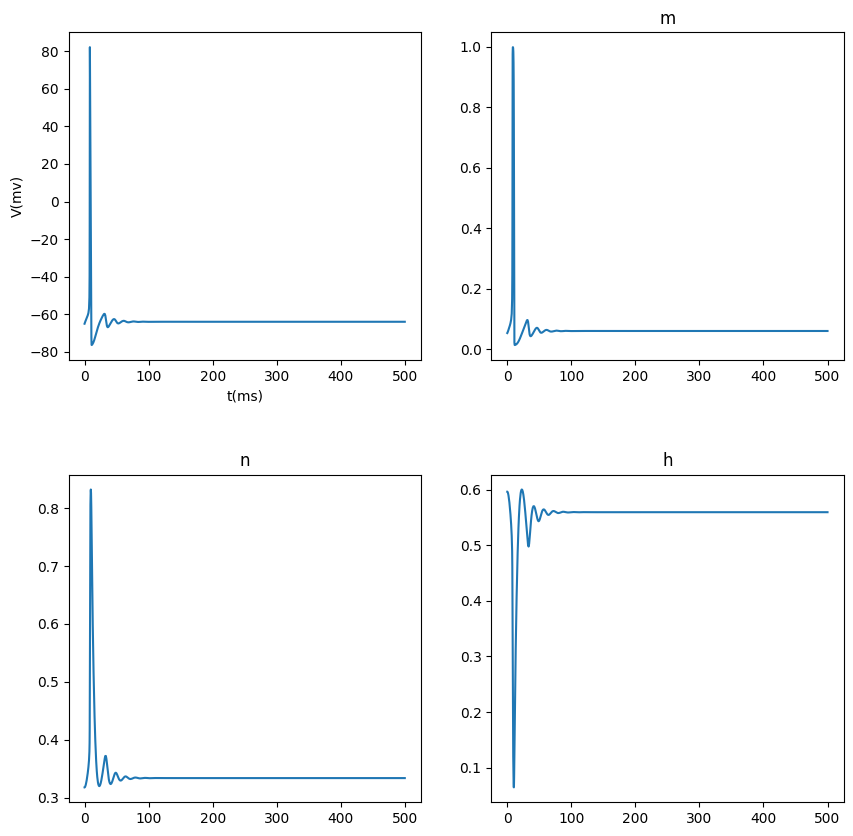

In [8]:
p=[6]; include("myhh.jl")

## Exercises

1. Can you find the critical value of I where you first get a spike
generated?

2. Can you work out the units on I (check equation 1 and Table 1 of spa3)?

3. Estimate the firing rate (in Hz) for the model as you vary I from 0
   to 500.  Can you plot a graph of it?  e.g. see
   [hh_plotrate.m](hh_plotrate.m) for a template.

4. (Advanced) Apply a pulse of negative current with I=-50
   for 5 ms followed by I=0 and describe what happens.

5. Try other manipulations, e.g. what if you set dh/dt to
   zero?  What would this simulate?
                    
                

# Izhikevich models


Let's simplify the models as far as we can; we are going to use the
simplification due to Izhikevich.

Read
[the basic description](http://www.izhikevich.org/human_brain_simulation/Blue_Brain.htm#models%20of%20spiking%20neurons)
and guess which is the real data.

## The basic model

![http://www.izhikevich.org/publications/izhik.gif](izhik.gif)


## Exercise: Izhikevich

1. [izh.jl](izh.jl) has the basic code for one of the models.  Try to
   adapt using parameters a,b,c,d to generate each of the plots from
   above.  e.g. how can you make a chattering cell (CH)?

2. Explore [figure1.jl](figure1.jl).  This regenerates figure 1 of the
   [2004 paper](http://www.izhikevich.org/publications/whichmod.pdf).
   See if you can follow in the code how the model is adapted in each
   case.
   

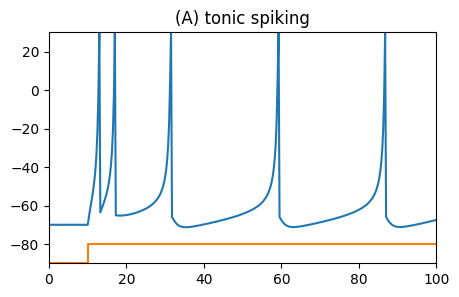

(-90.0, 30.0)

In [10]:
a=0.02; b=0.2;  c=-65;  d=6; include("izh.jl"); izh(a=0.02, b=0.2, c=-65,d=6.0)

### All 20 conditions

Here in [figure1.jl](figure1.jl) we have all the conditions listed in the 2004 paper.

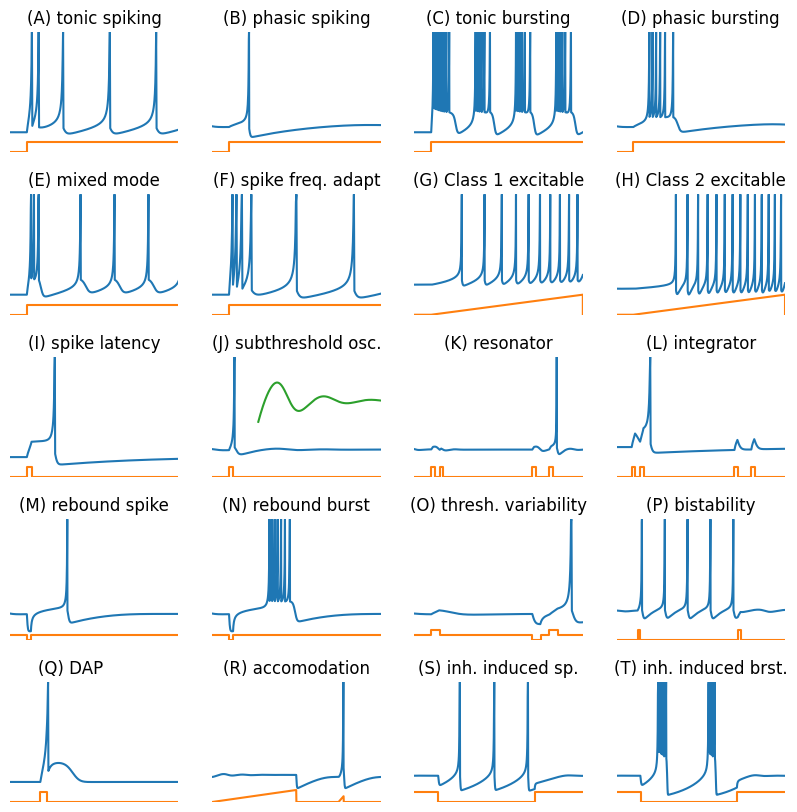

In [11]:
include("figure1.jl")

# Coupling two neurons


## Winner-take-all (WTA) network.

Eqn 6.18 from Wilson (1999).  Couple two neurons that inhibit each other.

$\tau \frac{dE_1}{dt} = -E_1 + S(K_1 - 3E_2)$

$\tau \frac{dE_2}{dt} = -E_2 + S(K_2 - 3E_1)$

$S(x) = [ 100(x^2) / (120^2 + x^2) ]_+$



We will first run the script [WTA2.m](WTA2.m) with input to neuron 1 =
60 and input to neuron 2 = 70.  We will examine the phase plane.

In [12]:
include("WTA2.jl")

WTA2 (generic function with 1 method)

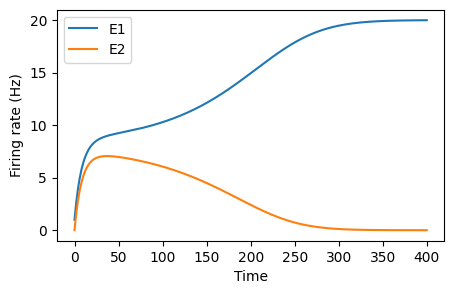

PyObject Text(24.000000000000007, 0.5, 'Firing rate (Hz)')

In [16]:
time, res = WTA2(60.0, 60.0)
fig, axes = subplots(1,1,figsize=(5,3))
plot(time, res[1,:], label="E1")
plot(time, res[2,:], label="E2")
legend(loc=2)
xlabel("Time"); ylabel("Firing rate (Hz)")

### Exercises

1. When the input to both cells is equal, what is the critical value
   when one neurons dominates?  Start with input to both cells equal
   to 20.

2. Examine what happens when input to both neurons is 100.  Run it
   several times and see which one wins.  Can you explain (and then
   test) your result?

## Coupling inhibitory neurons, part II.

Wilson (Chapter 12) shows how pairs of neurons coupled with reciprocal
inhibition can generate out-of-phase firing (not WTA).

Try [IPSP.jl](IPSP.jl) with $I_1 = 1.1, I_2=1.0, k=5$.  We should see out-of-phase spiking.


### Exercises

1. Set TauSyn to 2 ms (rather than 1 ms) and repeat with above parameters.  What do you
observe?

2. As above, but with $I_1 = 1.05$; now what happens?


In [17]:
include("IPSP.jl")

time, X = IPSPinteractions(1.1, 1.0, 5.0, 1.0)
fig, axes = subplots(1,1,figsize=(5,3))
plot(time, X[1,:], label="E1")
plot(time, X[3,:], label="E3")
legend(loc=2)


MethodError: MethodError: no method matching Array{Float64,N} where N(::Int64, ::Int64)
Closest candidates are:
  Array{Float64,N} where N(!Matched::UndefInitializer, ::Int64) where T at boot.jl:419
  Array{Float64,N} where N(!Matched::UndefInitializer, ::Int64, !Matched::Int64) where T at boot.jl:420
  Array{Float64,N} where N(!Matched::UndefInitializer, ::Int64, !Matched::Int64, !Matched::Int64) where T at boot.jl:421
  ...